In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('bank.csv')

In [4]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
data.shape

(11162, 17)

In [6]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [7]:
data.drop('default',axis = 1,inplace = True) #default column removed

In [8]:
data = data[data['balance']>0]

In [9]:
data.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [10]:
data.shape #account with no balance are removed 

(9700, 16)

In [11]:
data.duplicated().sum()

0

In [12]:
data.isna().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [13]:
data['job'].value_counts()

management       2257
blue-collar      1622
technician       1585
admin.           1149
services          781
retired           710
self-employed     357
student           344
unemployed        317
entrepreneur      275
housemaid         240
unknown            63
Name: job, dtype: int64

In [14]:
data['education'].value_counts()

secondary    4722
tertiary     3256
primary      1269
unknown       453
Name: education, dtype: int64

In [15]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,9700.000000,9700.000000,9700.000000,9700.000000,9700.000000,9700.000000,9700.000000
mean,41.255464,1781.889278,15.567732,372.763196,2.463505,53.488866,0.873093
std,12.129780,3386.006718,8.391975,345.912650,2.630335,110.204741,2.357754
min,18.000000,1.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,258.000000,8.000000,140.000000,1.000000,-1.000000,0.000000
50%,39.000000,730.000000,15.000000,257.000000,2.000000,-1.000000,0.000000
75%,49.000000,2021.250000,21.000000,493.000000,3.000000,83.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [16]:
cata_features = []
cont_features = []

for x in data.columns:
    if data[x].dtypes == 'int64':
        cont_features += [x]
    else:
        cata_features += [x]

In [17]:
data[cata_features].nunique()

job          12
marital       3
education     4
housing       2
loan          2
contact       3
month        12
poutcome      4
deposit       2
dtype: int64

### Visualization

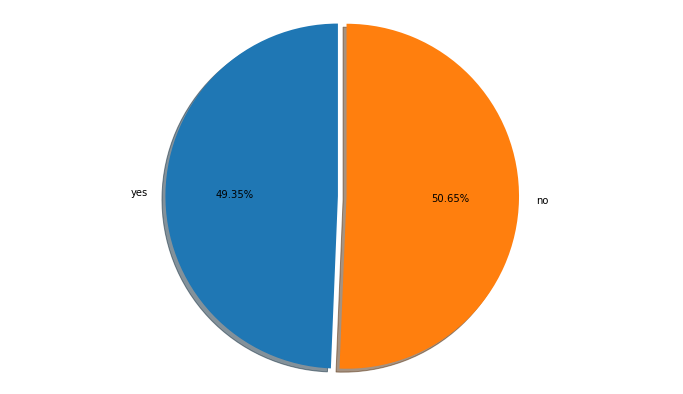

In [18]:
labels = data['deposit'].unique()
fig1, ax1 = plt.subplots(figsize=(12, 7))
exp = [0,.05]
ax1.pie(data['deposit'].value_counts(ascending=True), explode=exp, labels=labels, autopct='%2.2f%%', pctdistance=0.6,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

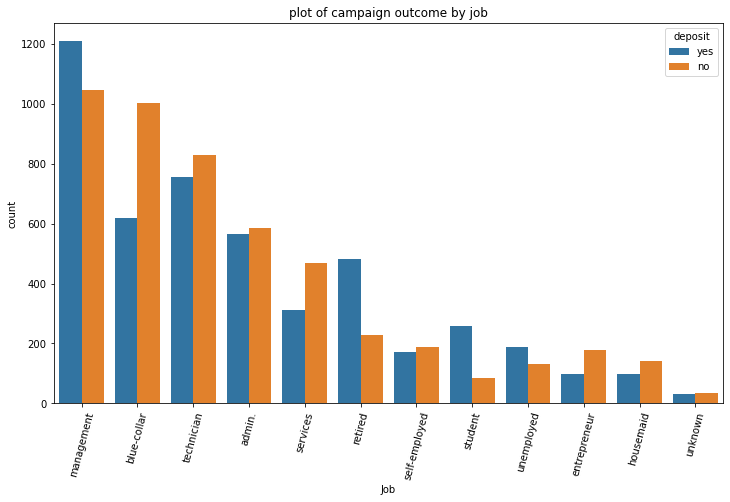

In [19]:
plt.figure(figsize=(12,7))
sns.countplot(data=data, x='job', order = data['job'].value_counts().index, hue='deposit')
plt.xlabel('Job')
plt.xticks(rotation=75)
plt.title("plot of campaign outcome by job")

plt.show()

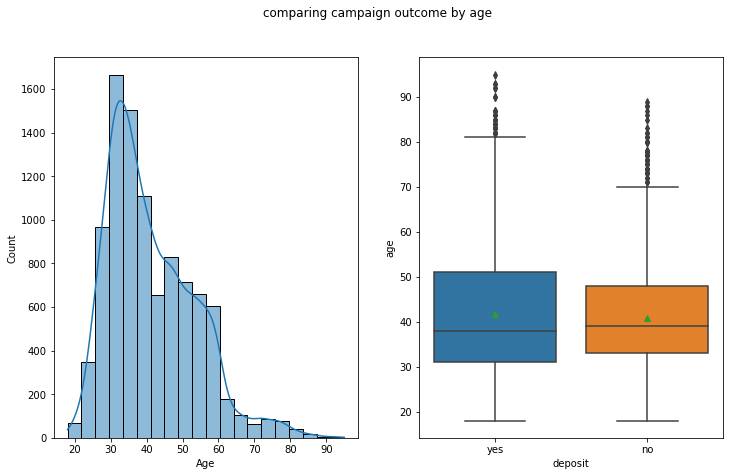

In [20]:
fig = plt.figure(figsize=(12, 7))

fig.add_subplot(121)
sns.histplot(data=data, x='age', bins=20, kde=True)
plt.xlabel('Age')
fig.add_subplot(122)
sns.boxplot(data=data, x='deposit', y='age', showmeans=True)
fig.suptitle('comparing campaign outcome by age')
plt.show()

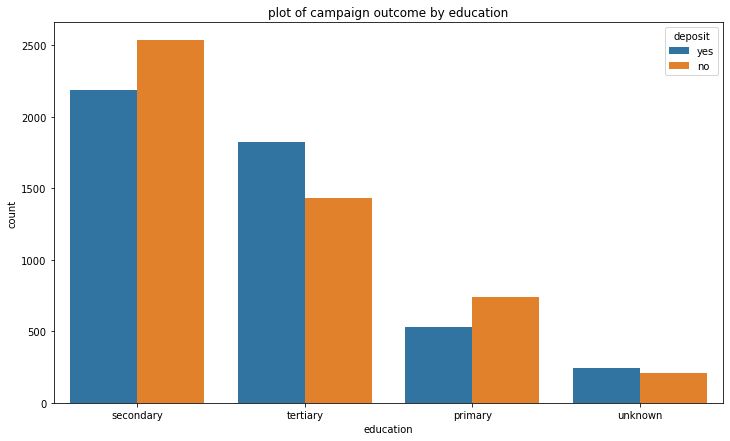

In [21]:
plt.figure(figsize=(12,7))
sns.countplot(data=data, x='education', order = data['education'].value_counts().index, hue='deposit' )

plt.title("plot of campaign outcome by education")

plt.show()

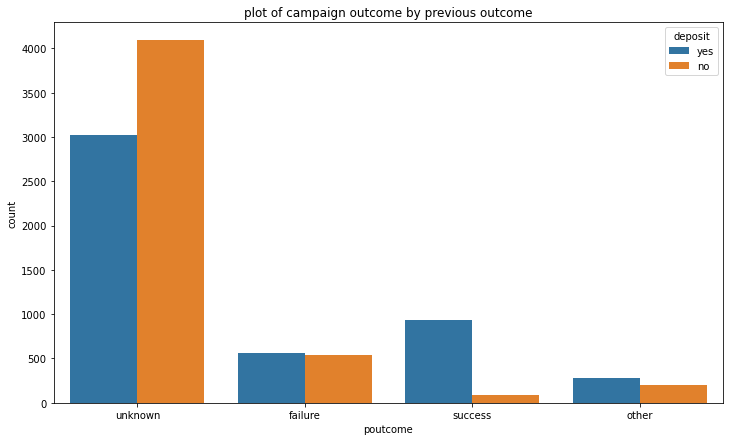

In [22]:
plt.figure(figsize=(12,7))
sns.countplot(data=data, x='poutcome', order = data['poutcome'].value_counts().index, hue='deposit')

plt.title("plot of campaign outcome by previous outcome")

plt.show()

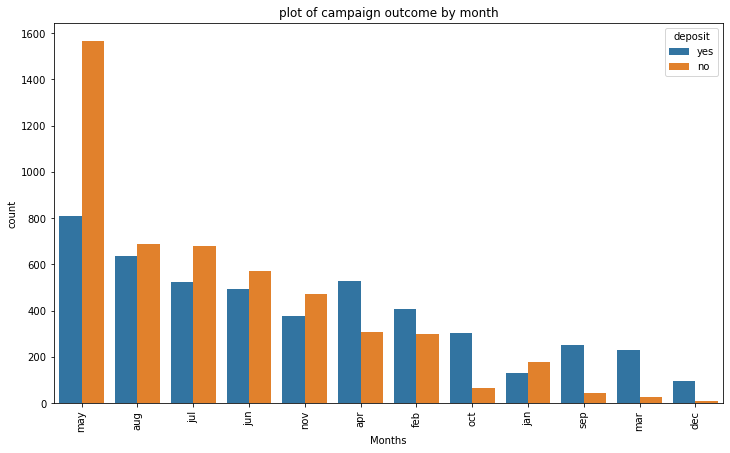

In [23]:
plt.figure(figsize=(12,7))
sns.countplot(data=data, x='month',order = data['month'].value_counts().index , hue='deposit')
plt.xlabel('Months')
plt.xticks(rotation = 'vertical')
plt.title('plot of campaign outcome by month')
plt.show()

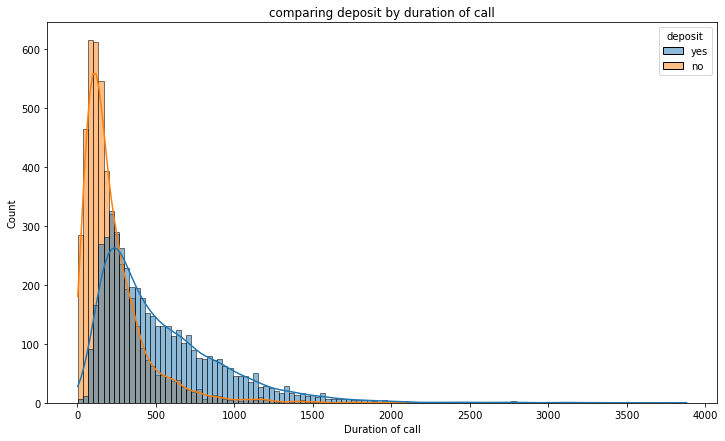

In [24]:
plt.figure(figsize=(12,7))
sns.histplot(data=data, x='duration', hue='deposit', kde=True)
plt.xlabel('Duration of call')
plt.title('comparing deposit by duration of call')

plt.show()

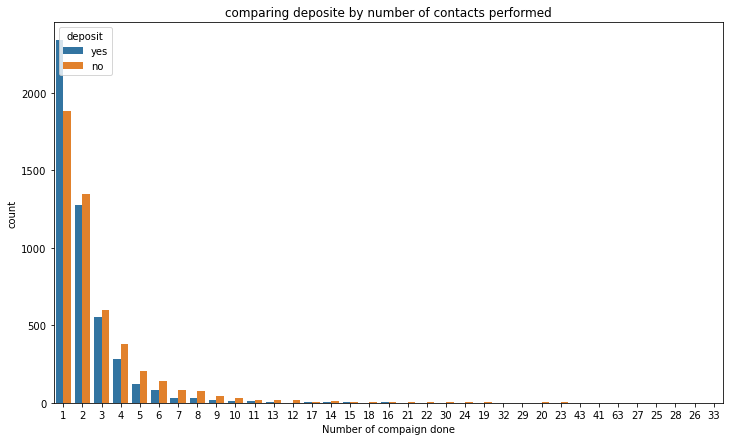

In [25]:
plt.figure(figsize=(12,7))
sns.countplot(data=data, x='campaign',order = data['campaign'].value_counts().index , hue='deposit')
plt.xlabel('Number of compaign done')

plt.title('comparing deposite by number of contacts performed')
plt.show()

In [26]:
data.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [27]:
col = data['balance']
col.max()

81204

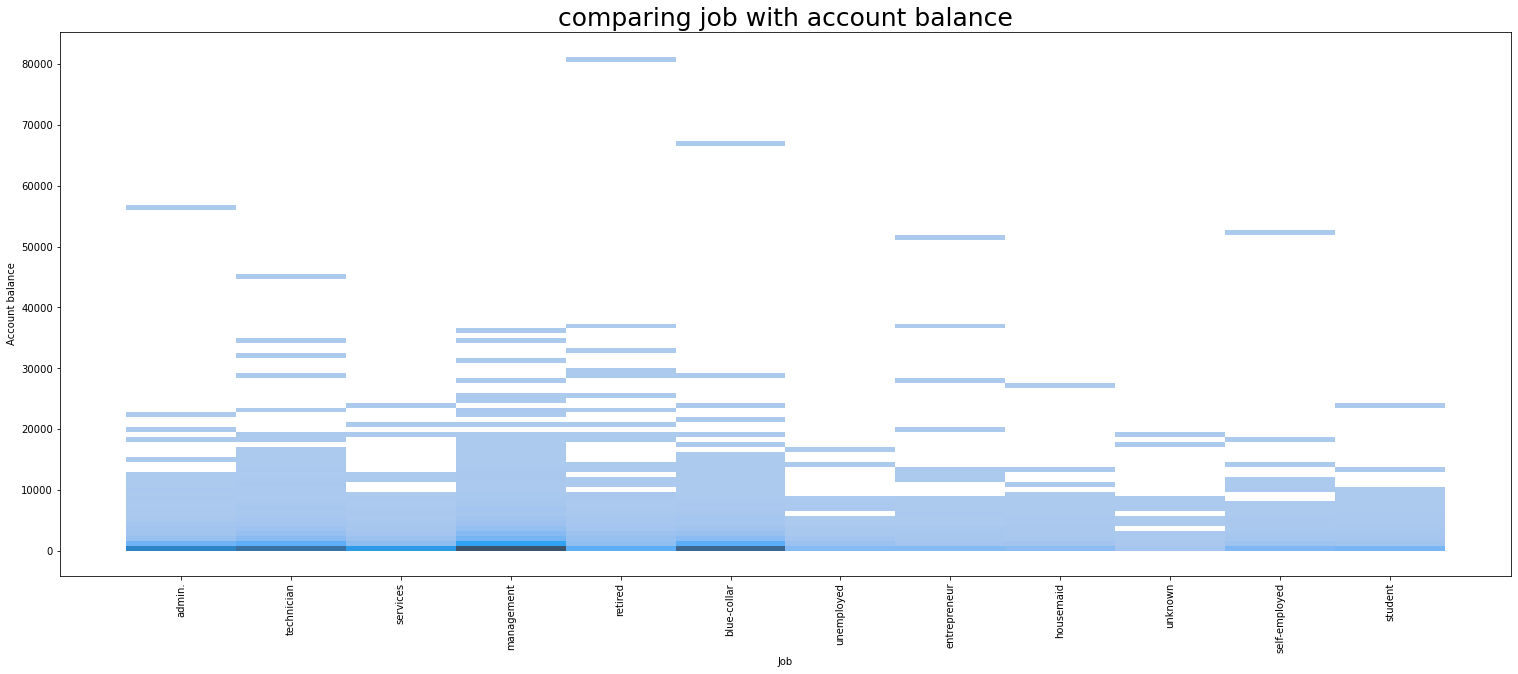

In [28]:
plt.figure(figsize = (26,10))
sns.histplot(data=data,x='job',y='balance' ,bins = 100)
plt.xticks(rotation='vertical')
plt.xlabel('Job')
plt.ylabel('Account balance')
plt.title('comparing job with account balance', fontsize = 25)
plt.show()

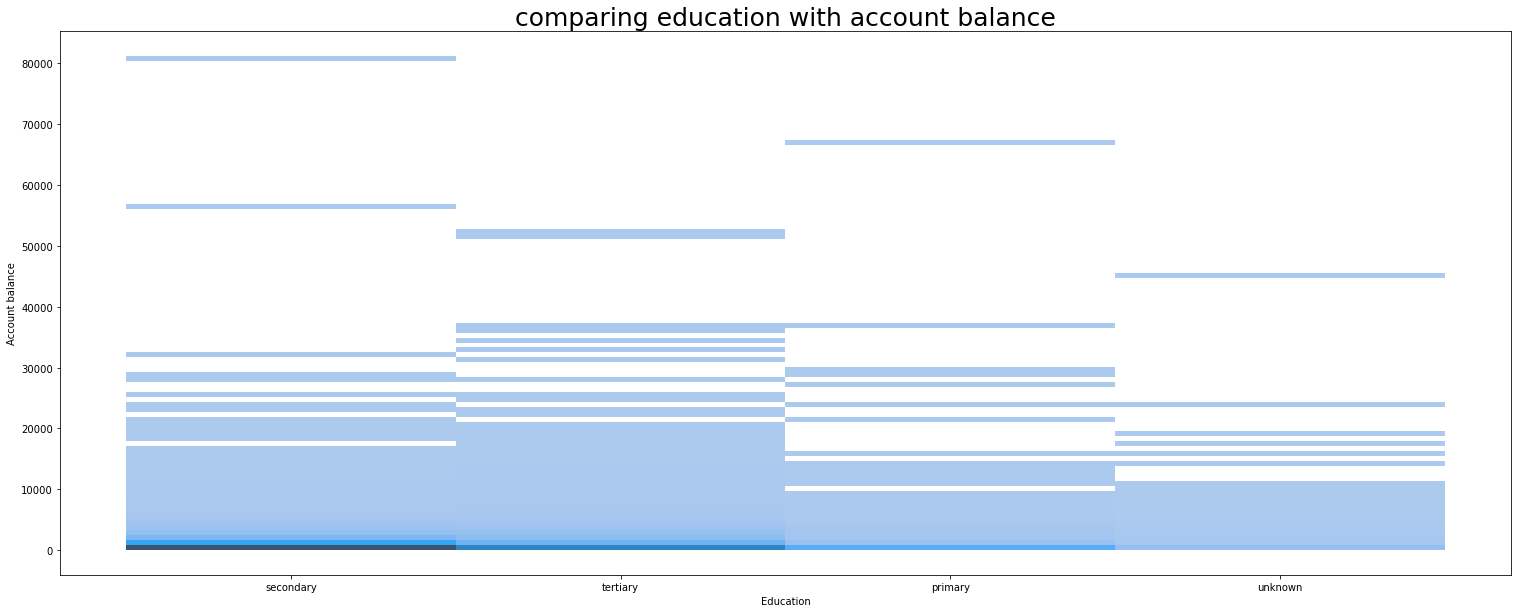

In [29]:
plt.figure(figsize = (26,10))
sns.histplot(data=data,x='education',y='balance', bins = 100)
plt.xticks(rotation=0)
plt.xlabel('Education')
plt.ylabel('Account balance')
plt.title('comparing education with account balance', fontsize = 25)
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


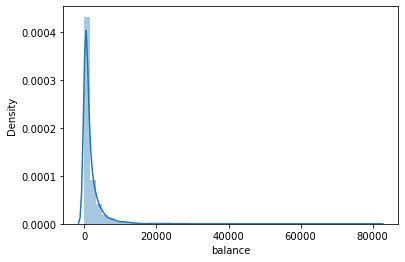

In [31]:
sns.distplot(data['balance']);